In [146]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import requests
from __future__ import print_function
import json
import sys
from random import randint
from time import sleep
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
from datetime import datetime
import base64
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from matplotlib.lines import Line2D
from sklearn.cluster import KMeans
from sklearn import cluster
from sklearn.metrics import silhouette_score
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import NearestCentroid

In [116]:
candidate_items = pd.read_csv('candidate_items.csv')
item_features = pd.read_csv('item_features.csv')
train_purchases = pd.read_csv('train_purchases.csv')
train_sessions = pd.read_csv('train_sessions.csv')
test_leaderboard_sessions =  pd.read_csv('test_leaderboard_sessions.csv')

display(test_leaderboard_sessions.head())
display(item_features.head())
display(train_purchases.shape)
display(train_sessions.shape)

,session_id,item_id,date
0,26,19185,2021-06-16 09:53:54.158
1,200,17089,2021-06-25 12:23:40.811
2,200,17089,2021-06-25 12:24:36.631
3,200,8060,2021-06-25 12:24:41.677
4,200,4758,2021-06-25 12:24:50.692


,item_id,feature_category_id,feature_value_id
0,2,56,365
1,2,62,801
2,2,68,351
3,2,33,802
4,2,72,75


(1000000, 3)

(4743820, 3)

In [117]:
#item_features.info()
#item_features.feature_value_id.value_counts()

In [119]:
train_sessions.info()
#train_purchases.item_id.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4743820 entries, 0 to 4743819
Data columns (total 3 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   session_id  int64 
 1   item_id     int64 
 2   date        object
dtypes: int64(2), object(1)
memory usage: 108.6+ MB


In [110]:
item_features[item_features['item_id'] == 3416]
train_purchases[train_purchases['session_id'] == 3]

,session_id,item_id,date
0,3,15085,2020-12-18 21:26:47.986


In [120]:
#train_sessions['session_id'].value_counts()

In [121]:
group = train_sessions.groupby(['session_id']).agg({'item_id':'count'})
#group

In [122]:
group1 = train_sessions.groupby(['item_id']).agg({'session_id':'count'}).sort_values(by=['item_id'], ascending = True).reset_index()
#group1

In [123]:
transactions = train_purchases.groupby(['item_id']).agg({'session_id':'count'}).sort_values(by=['item_id'], ascending = True).reset_index()
#transactions

In [125]:
sales = pd.merge(group1, transactions, how="left", on=["item_id"])
sales =sales.rename(columns={'session_id_x': 'sessions', 'session_id_y': 'transactions'})
sales = sales.fillna(0)
sales['conversion'] = round(sales['transactions']/sales['sessions'],2)
#sales

In [127]:
conversion_quartiles = pd.qcut(sales['conversion'], q=4, labels=range(1,5))
sales['conversion_quartiles'] = conversion_quartiles
sales.sort_values('conversion')

,item_id,sessions,transactions,conversion,conversion_quartiles
0,2,1,0.0,0.0,1
10497,12580,7,0.0,0.0,1
10494,12575,1,0.0,0.0,1
10491,12572,9,0.0,0.0,1
10488,12569,4,0.0,0.0,1
...,...,...,...,...,...
13506,16160,1,3.0,3.0,4
22309,26701,1,3.0,3.0,4
12611,15106,1,3.0,3.0,4
5362,6431,1,3.0,3.0,4


In [128]:
#item_features['feature_category_id'].nunique()
item_features['feature_value_id'].nunique()
item_features['item_id'].unique()

array([    2,     3,     4, ..., 28141, 28142, 28143])

In [129]:
item_features2 = pd.get_dummies(item_features, columns =['feature_category_id'])

In [130]:
item_features2

,item_id,feature_value_id,feature_category_id_1,feature_category_id_2,feature_category_id_3,feature_category_id_4,feature_category_id_5,feature_category_id_6,feature_category_id_7,feature_category_id_8,feature_category_id_9,feature_category_id_10,feature_category_id_11,feature_category_id_12,feature_category_id_13,feature_category_id_14,feature_category_id_15,feature_category_id_16,feature_category_id_17,feature_category_id_18,feature_category_id_19,feature_category_id_20,feature_category_id_21,feature_category_id_22,feature_category_id_23,feature_category_id_24,feature_category_id_25,feature_category_id_26,feature_category_id_27,feature_category_id_28,feature_category_id_29,feature_category_id_30,feature_category_id_31,feature_category_id_32,feature_category_id_33,feature_category_id_34,feature_category_id_35,feature_category_id_36,feature_category_id_37,feature_category_id_38,feature_category_id_39,feature_category_id_40,feature_category_id_41,feature_category_id_42,feature_category_id_43,feature_category_id_44,feature_category_id_45,feature_category_id_46,feature_category_id_47,feature_category_id_48,feature_category_id_49,feature_category_id_50,feature_category_id_51,feature_category_id_52,feature_category_id_53,feature_category_id_54,feature_category_id_55,feature_category_id_56,feature_category_id_57,feature_category_id_58,feature_category_id_59,feature_category_id_60,feature_category_id_61,feature_category_id_62,feature_category_id_63,feature_category_id_64,feature_category_id_65,feature_category_id_66,feature_category_id_67,feature_category_id_68,feature_category_id_69,feature_category_id_70,feature_category_id_71,feature_category_id_72,feature_category_id_73
0,2,365,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2,351,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,2,802,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471746,28143,351,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
471747,28143,390,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
471748,28143,109,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
471749,28143,91,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [131]:
item_features3 = pd.get_dummies(item_features2, columns =['feature_value_id'])
item_features3

item_id  feature_category_id_1  feature_category_id_2  \
0             2                      0                      0   
1             2                      0                      0   
2             2                      0                      0   
3             2                      0                      0   
4             2                      0                      0   
...         ...                    ...                    ...   
471746    28143                      0                      0   
471747    28143                      0                      0   
471748    28143                      0                      0   
471749    28143                      0                      0   
471750    28143                      0                      0   

        feature_category_id_3  feature_category_id_4  feature_category_id_5  \
0                           0                      0                      0   
1                           0                      0                      0   
2                           0                      0                      0   
3                           0                      0                      0   
4                           0                      0                      0   
...                       ...                    ...                    ...   
471746                      0                      0                      0   
471747                      0                      0                      0   
471748                      0                      0                      0   
471749                      0                      0                      0   
471750                      0                      0                      0   

        feature_category_id_6  feature_category_id_7  feature_category_id_8  \
0                           0                      0                      0   
1                           0                      0                      0   
2                           0                      0                      0   
3                           0                      0                      0   
4                           0                      0                      0   
...                       ...                    ...                    ...   
471746                      0                      0                      0   
471747                      0                      0                      0   
471748                      0                      0                      0   
471749                      0                      0                      0   
471750                      0                      0                      0   

        feature_category_id_9  feature_category_id_10  feature_category_id_11  \
0                           0                       0                       0   
1                           0                       0                       0   
2                           0                       0                       0   
3                           0                       0                       0   
4                           0                       0                       0   
...                       ...                     ...                     ...   
471746                      0                       0                       0   
471747                      0                       0                       0   
471748                      0                       0                       1   
471749                      0                       0                       0   
471750                      0                       0                       0   

        feature_category_id_12  feature_category_id_13  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   
...     

In [132]:
item_features3[item_features3['item_id']== 2]

,item_id,feature_category_id_1,feature_category_id_2,feature_category_id_3,feature_category_id_4,feature_category_id_5,feature_category_id_6,feature_category_id_7,feature_category_id_8,feature_category_id_9,feature_category_id_10,feature_category_id_11,feature_category_id_12,feature_category_id_13,feature_category_id_14,feature_category_id_15,feature_category_id_16,feature_category_id_17,feature_category_id_18,feature_category_id_19,feature_category_id_20,feature_category_id_21,feature_category_id_22,feature_category_id_23,feature_category_id_24,feature_category_id_25,feature_category_id_26,feature_category_id_27,feature_category_id_28,feature_category_id_29,feature_category_id_30,feature_category_id_31,feature_category_id_32,feature_category_id_33,feature_category_id_34,feature_category_id_35,feature_category_id_36,feature_category_id_37,feature_category_id_38,feature_category_id_39,feature_category_id_40,feature_category_id_41,feature_category_id_42,feature_category_id_43,feature_category_id_44,feature_category_id_45,feature_category_id_46,feature_category_id_47,feature_category_id_48,feature_category_id_49,feature_category_id_50,feature_category_id_51,feature_category_id_52,feature_category_id_53,feature_category_id_54,feature_category_id_55,feature_category_id_56,feature_category_id_57,feature_category_id_58,feature_category_id_59,feature_category_id_60,feature_category_id_61,feature_category_id_62,feature_category_id_63,feature_category_id_64,feature_category_id_65,feature_category_id_66,feature_category_id_67,feature_category_id_68,feature_category_id_69,feature_category_id_70,feature_category_id_71,feature_category_id_72,feature_category_id_73,feature_value_id_1,feature_value_id_2,feature_value_id_3,feature_value_id_4,feature_value_id_5,feature_value_id_6,feature_value_id_7,feature_value_id_8,feature_value_id_10,feature_value_id_11,feature_value_id_12,feature_value_id_13,feature_value_id_14,feature_value_id_15,feature_value_id_16,feature_value_id_17,feature_value_id_18,feature_value_id_19,feature_value_id_20,feature_value_id_21,feature_value_id_22,feature_value_id_23,feature_value_id_24,feature_value_id_25,feature_value_id_26,feature_value_id_27,feature_value_id_28,feature_value_id_29,feature_value_id_30,feature_value_id_31,feature_value_id_32,feature_value_id_33,feature_value_id_34,feature_value_id_35,feature_value_id_36,feature_value_id_37,feature_value_id_38,feature_value_id_39,feature_value_id_40,feature_value_id_41,feature_value_id_42,feature_value_id_43,feature_value_id_44,feature_value_id_45,feature_value_id_46,feature_value_id_47,feature_value_id_48,feature_value_id_49,feature_value_id_50,feature_value_id_51,feature_value_id_52,feature_value_id_53,feature_value_id_54,feature_value_id_55,feature_value_id_56,feature_value_id_57,feature_value_id_58,feature_value_id_59,feature_value_id_60,feature_value_id_61,feature_value_id_62,feature_value_id_63,feature_value_id_64,feature_value_id_65,feature_value_id_66,feature_value_id_67,feature_value_id_68,feature_value_id_69,feature_value_id_70,feature_value_id_71,feature_value_id_72,feature_value_id_73,feature_value_id_74,feature_value_id_75,feature_value_id_76,feature_value_id_77,feature_value_id_78,feature_value_id_79,feature_value_id_80,feature_value_id_81,feature_value_id_82,feature_value_id_83,feature_value_id_84,feature_value_id_85,feature_value_id_86,feature_value_id_88,feature_value_id_89,feature_value_id_90,feature_value_id_91,feature_value_id_92,feature_value_id_93,feature_value_id_94,feature_value_id_95,feature_value_id_96,feature_value_id_97,feature_value_id_98,feature_value_id_99,feature_value_id_100,feature_value_id_101,feature_value_id_102,feature_value_id_103,feature_value_id_104,feature_value_id_105,feature_value_id_106,feature_value_id_107,feature_value_id_108,feature_value_id_109,feature_value_id_110,feature_value_id_111,feature_value_id_112,feature_value_id_113,feature_value_id_114,feature_value_id_115,feature_value_id_116,feature_value_id_117,feature_val

In [133]:
items = item_features3.groupby(['item_id']).sum().sort_values(by=['item_id'], ascending = True).reset_index()

In [134]:
items

item_id  feature_category_id_1  feature_category_id_2  \
0            2                      0                      0   
1            3                      0                      0   
2            4                      0                      0   
3            7                      0                      0   
4            8                      0                      0   
...        ...                    ...                    ...   
23686    28139                      0                      0   
23687    28140                      0                      1   
23688    28141                      1                      0   
23689    28142                      0                      0   
23690    28143                      0                      0   

       feature_category_id_3  feature_category_id_4  feature_category_id_5  \
0                          0                      0                      0   
1                          1                      1                      1   
2                          1                      1                      1   
3                          0                      0                      0   
4                          1                      1                      1   
...                      ...                    ...                    ...   
23686                      1                      1                      1   
23687                      0                      0                      0   
23688                      1                      1                      1   
23689                      0                      0                      0   
23690                      0                      0                      0   

       feature_category_id_6  feature_category_id_7  feature_category_id_8  \
0                          0                      1                      0   
1                          0                      1                      0   
2                          0                      1                      0   
3                          0                      1                      0   
4                          0                      1                      0   
...                      ...                    ...                    ...   
23686                      0                      1                      0   
23687                      0                      0                      0   
23688                      0                      1                      0   
23689                      0                      1                      0   
23690                      0                      1                      0   

       feature_category_id_9  feature_category_id_10  feature_category_id_11  \
0                          0                       0                       0   
1                          0                       0                       1   
2                          0                       0                       0   
3                          0                       0                       0   
4                          0                       0                       1   
...                      ...                     ...                     ...   
23686                      0                       0                       0   
23687                      0                       0                       0   
23688                      0                       0                       0   
23689                      0                       0                       0   
23690                      0                       0                       1   

       feature_category_id_12  feature_category_id_13  feature_category_id_14  \
0                           0                       0                       0   
1                           0                       0                       0   
2                           0                       0                       0   
3                           0                       0                       0  

In [136]:
all_data = pd.merge(items, sales, how="left", on=["item_id"])
all_data['conversion_quartiles'] = pd.factorize(all_data['conversion_quartiles'])[0]
all_data = all_data.fillna(0)
all_data

item_id  feature_category_id_1  feature_category_id_2  \
0            2                      0                      0   
1            3                      0                      0   
2            4                      0                      0   
3            7                      0                      0   
4            8                      0                      0   
...        ...                    ...                    ...   
23686    28139                      0                      0   
23687    28140                      0                      1   
23688    28141                      1                      0   
23689    28142                      0                      0   
23690    28143                      0                      0   

       feature_category_id_3  feature_category_id_4  feature_category_id_5  \
0                          0                      0                      0   
1                          1                      1                      1   
2                          1                      1                      1   
3                          0                      0                      0   
4                          1                      1                      1   
...                      ...                    ...                    ...   
23686                      1                      1                      1   
23687                      0                      0                      0   
23688                      1                      1                      1   
23689                      0                      0                      0   
23690                      0                      0                      0   

       feature_category_id_6  feature_category_id_7  feature_category_id_8  \
0                          0                      1                      0   
1                          0                      1                      0   
2                          0                      1                      0   
3                          0                      1                      0   
4                          0                      1                      0   
...                      ...                    ...                    ...   
23686                      0                      1                      0   
23687                      0                      0                      0   
23688                      0                      1                      0   
23689                      0                      1                      0   
23690                      0                      1                      0   

       feature_category_id_9  feature_category_id_10  feature_category_id_11  \
0                          0                       0                       0   
1                          0                       0                       1   
2                          0                       0                       0   
3                          0                       0                       0   
4                          0                       0                       1   
...                      ...                     ...                     ...   
23686                      0                       0                       0   
23687                      0                       0                       0   
23688                      0                       0                       0   
23689                      0                       0                       0   
23690                      0                       0                       1   

       feature_category_id_12  feature_category_id_13  feature_category_id_14  \
0                           0                       0                       0   
1                           0                       0                       0   
2                           0                       0                       0   
3                           0                       0                       0  

In [137]:
train_sessions = train_sessions.sort_values(['session_id', 'date'],
                    ascending=[False, True])
train_sessions['visit_order'] = train_sessions.groupby('session_id').cumcount() + 1
#train_sessions

,session_id,item_id,date,visit_order
4743801,4440001,25273,2020-10-30 16:42:16.855,1
4743810,4440001,25129,2020-10-30 16:42:52.451,2
4743808,4440001,3481,2020-10-30 16:44:09.09,3
4743809,4440001,27400,2020-10-30 16:44:15.953,4
4743807,4440001,25273,2020-10-30 23:24:55.227,5
...,...,...,...,...
4,18,2507,2020-08-26 19:16:31.211,2
3,18,18316,2020-08-26 19:18:30.833,3
2,13,15654,2020-03-13 19:35:27.136,1
1,3,9655,2020-12-18 21:19:48.093,1


In [138]:
df_paths = train_sessions.groupby('session_id')['item_id'].aggregate(lambda x: x.unique().tolist()).reset_index()
    
df_last_interaction = train_sessions.drop_duplicates('session_id', keep='last')[['session_id', 'date']]
df_paths = pd.merge(df_paths, df_last_interaction, how='left', on='session_id')
#df_paths

,session_id,item_id,date
0,3,[9655],2020-12-18 21:25:00.373
1,13,[15654],2020-03-13 19:35:27.136
2,18,"[4026, 2507, 18316]",2020-08-26 19:18:30.833
3,19,"[19896, 27937, 12804, 25772, 6341, 23687, 8316...",2020-11-02 16:48:39.343
4,24,"[2927, 16064, 11662, 434, 18539, 10414, 28075,...",2020-02-26 18:24:32.77
...,...,...,...
999995,4439986,"[23502, 13914, 13403, 19310, 12373, 27733]",2021-05-13 11:55:50.151
999996,4439990,"[22093, 17429, 1389, 1131, 4062, 26011, 4028, ...",2020-08-22 12:36:27.326
999997,4439994,[25357],2020-11-27 20:08:37.262
999998,4439999,"[6007, 8502, 13056, 2173, 8433, 1299, 15853]",2020-11-27 10:59:28.653


In [139]:
items_transactions = train_purchases.groupby('session_id')['item_id'].aggregate(lambda x: x.unique().tolist()).reset_index()
    
items_transactions_last_interaction = train_purchases.drop_duplicates('session_id', keep='last')[['session_id', 'date']]
items_transactions = pd.merge(items_transactions, items_transactions_last_interaction, how='left', on='session_id')
#items_transactions

,session_id,item_id,date
0,3,[15085],2020-12-18 21:26:47.986
1,13,[18626],2020-03-13 19:36:15.507
2,18,[24911],2020-08-26 19:20:32.049
3,19,[12534],2020-11-02 17:16:45.92
4,24,[13226],2020-02-26 18:27:44.114
...,...,...,...
999995,4439986,[2915],2021-05-13 11:56:37.464
999996,4439990,[8786],2020-08-22 14:28:22.382
999997,4439994,[21630],2020-11-27 20:10:28.961
999998,4439999,[16962],2020-11-27 11:01:41.356


In [141]:
result = pd.merge(df_paths, items_transactions, how="left", on=["session_id"])
result =result.rename(columns={'item_id_x': 'items_path', 'item_id_y': 'item_bought', 'date_x':'last_interaction','date_y':'date_trasaction'})
result = result.fillna(0)
#result['conversion'] = round(result['transactions']/result['sessions'],2)
result

,session_id,items_path,last_interaction,item_bought,date_trasaction
0,3,[9655],2020-12-18 21:25:00.373,[15085],2020-12-18 21:26:47.986
1,13,[15654],2020-03-13 19:35:27.136,[18626],2020-03-13 19:36:15.507
2,18,"[4026, 2507, 18316]",2020-08-26 19:18:30.833,[24911],2020-08-26 19:20:32.049
3,19,"[19896, 27937, 12804, 25772, 6341, 23687, 8316...",2020-11-02 16:48:39.343,[12534],2020-11-02 17:16:45.92
4,24,"[2927, 16064, 11662, 434, 18539, 10414, 28075,...",2020-02-26 18:24:32.77,[13226],2020-02-26 18:27:44.114
...,...,...,...,...,...
999995,4439986,"[23502, 13914, 13403, 19310, 12373, 27733]",2021-05-13 11:55:50.151,[2915],2021-05-13 11:56:37.464
999996,4439990,"[22093, 17429, 1389, 1131, 4062, 26011, 4028, ...",2020-08-22 12:36:27.326,[8786],2020-08-22 14:28:22.382
999997,4439994,[25357],2020-11-27 20:08:37.262,[21630],2020-11-27 20:10:28.961
999998,4439999,"[6007, 8502, 13056, 2173, 8433, 1299, 15853]",2020-11-27 10:59:28.653,[16962],2020-11-27 11:01:41.356


In [147]:
#items_clusters = items.drop('item_id', axis = 1)
item_id = items['item_id']
items_clusters
X = items_clusters

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

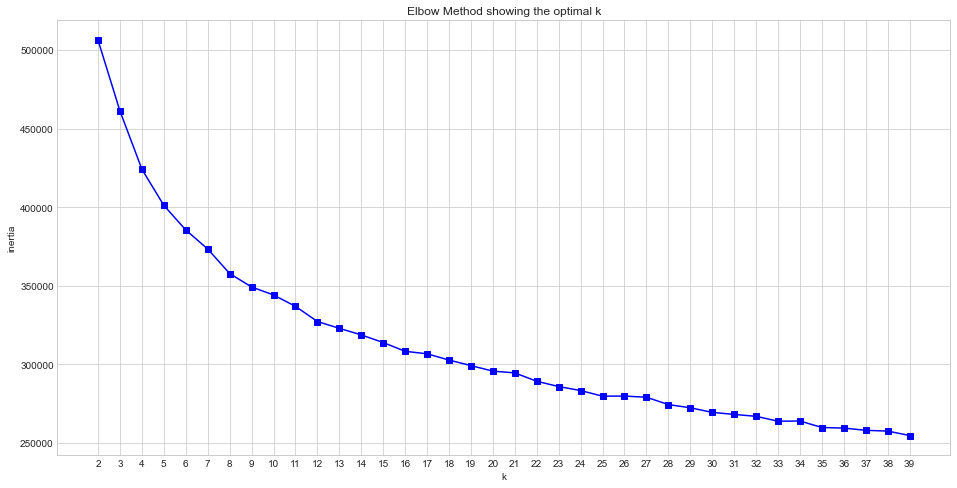

In [148]:
K = range(2, 40)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bs-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

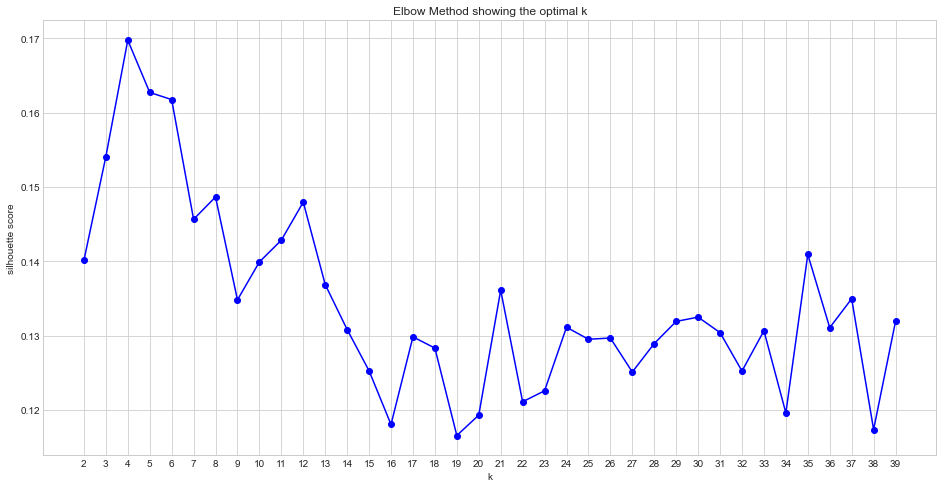

In [149]:
K = range(2, 40)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X)
    silhouette.append(silhouette_score(X, kmeans.predict(X)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bo-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [157]:
from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth = estimate_bandwidth(X, quantile=0.05, n_samples=100000)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 1


In [159]:
kmeans = KMeans(n_clusters=10, n_init = 100, max_iter=300, random_state = 42)
y_kmeans = kmeans.fit_predict(X)
# Predicting / assigning the clusters:
clusters = kmeans.predict(X)
# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0    1129
1    1729
2    3500
3    4539
4    2531
5    2121
6    2044
7    1901
8    2534
9    1663
dtype: int64

In [160]:
# Calculate Scores
score = silhouette_score(X, kmeans.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)
print(kmeans.inertia_)
kmeans.score(X)

Silhouetter Score: 0.148
341486.8884423893


-341486.8884423893

In [161]:
clusters = pd.Series(clusters)
item_cluster = pd.concat([item_id, clusters], axis=1)
item_cluster = item_cluster.rename(columns={0: 'cluster_kmeans'})
item_cluster

,item_id,cluster_kmeans
0,2,5
1,3,3
2,4,3
3,7,2
4,8,3
...,...,...
23686,28139,8
23687,28140,4
23688,28141,1
23689,28142,2
